Dataset source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/reecewu/Desktop/DAproject/Hotel booking demand_240516/hotel_bookings.csv')

df.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,reserved_room_type,deposit_type,avg_daily_rate,reservation_status
0,0,6,July,0,2,1,0.0,0,Regular,Website,A,No Deposit,0,Check-Out
1,1,88,July,0,4,2,0.0,0,Regular,Website,A,No Deposit,2295,Canceled
2,1,65,July,0,4,1,0.0,0,Regular,Website,A,No Deposit,2040,Canceled
3,1,92,July,2,4,2,0.0,0,Regular,Platform,A,No Deposit,2295,Canceled
4,1,100,July,0,2,2,0.0,0,Regular,Platform,A,No Deposit,2295,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_canceled              79330 non-null  int64  
 1   lead_time                79330 non-null  int64  
 2   arrival_date_month       79330 non-null  object 
 3   stays_in_weekend_nights  79330 non-null  int64  
 4   stays_in_week_nights     79330 non-null  int64  
 5   adults                   79330 non-null  int64  
 6   children                 79326 non-null  float64
 7   babies                   79330 non-null  int64  
 8   meal                     79330 non-null  object 
 9   distribution_channel     79330 non-null  object 
 10  reserved_room_type       79330 non-null  object 
 11  deposit_type             79330 non-null  object 
 12  avg_daily_rate           79330 non-null  int64  
 13  reservation_status       79330 non-null  object 
dtypes: float64(1), int64(7

In [4]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,avg_daily_rate
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000
mean,0.417270,109.735724,0.795185,2.182957,1.850977,0.091370,0.004941,3159.161276
std,0.493111,110.948526,0.885026,1.456416,0.509292,0.372177,0.084323,1308.086264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2376.000000
50%,0.000000,74.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2997.000000
75%,1.000000,163.000000,2.000000,3.000000,2.000000,0.000000,0.000000,3780.000000
max,1.000000,629.000000,16.000000,41.000000,4.000000,3.000000,10.000000,162000.000000


In [5]:
df.isnull().sum()

is_canceled                0
lead_time                  0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   4
babies                     0
meal                       0
distribution_channel       0
reserved_room_type         0
deposit_type               0
avg_daily_rate             0
reservation_status         0
dtype: int64

In [6]:
df = df.dropna(axis = 0)

df.isnull().sum()

is_canceled                0
lead_time                  0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
meal                       0
distribution_channel       0
reserved_room_type         0
deposit_type               0
avg_daily_rate             0
reservation_status         0
dtype: int64

In [7]:
df.shape

(79326, 14)

In [8]:
non_guest = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)

df = df[~non_guest]

## EDA

In [9]:
data = df[df['is_canceled'] == 0]

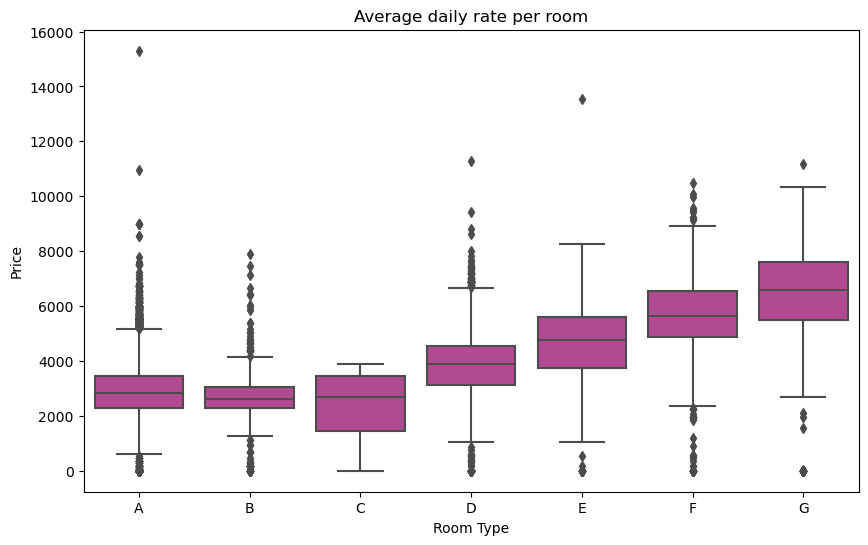

In [10]:
# Average daily rate per room

data = data.sort_values(by = 'reserved_room_type')

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'reserved_room_type', y = 'avg_daily_rate', data = data, color = '#c23a97')
plt.title('Average daily rate per room')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

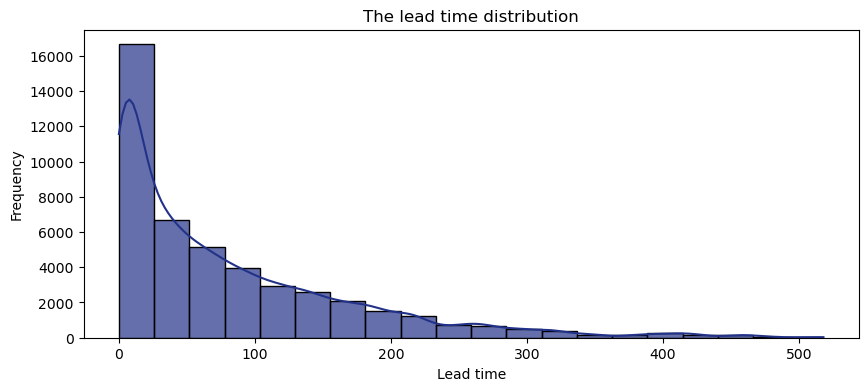

In [27]:
# The lead time distribution

plt.figure(figsize = (10, 4))
sns.histplot(x = 'lead_time', data = data, color = '#223289', bins = 20, alpha = 0.7, kde = True)
plt.title('The lead time distribution')
plt.xlabel('Lead time')
plt.ylabel('Frequency')
plt.show()

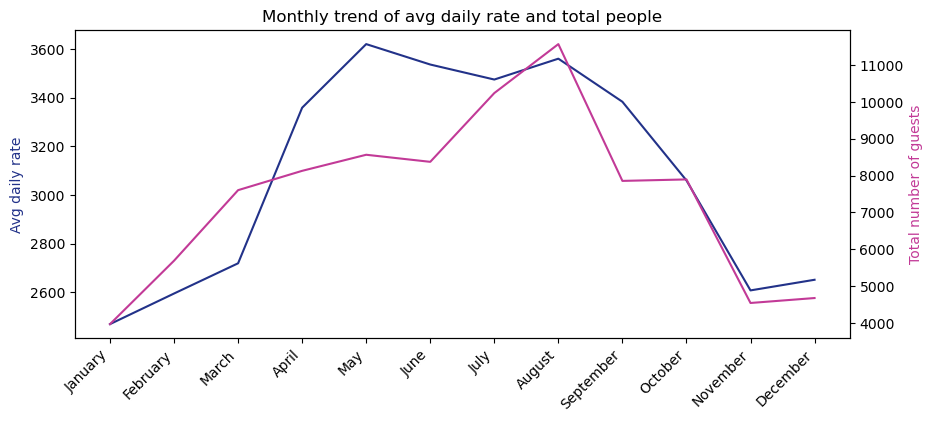

In [12]:
# Monthly trend of avg daily rate and total people

data['total_people'] = data['adults'] + data['children']

monthly_trend = data.groupby(['arrival_date_month']).agg({'avg_daily_rate': 'mean','total_people': 'sum'}).reset_index()
month_to_num = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, 
                 "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}

monthly_trend['month_to_num'] = monthly_trend['arrival_date_month'].map(month_to_num)
monthly_trend = monthly_trend.sort_values('month_to_num')

fig, ax1 = plt.subplots(figsize = (10, 4))
ax1.plot(monthly_trend['arrival_date_month'], monthly_trend['avg_daily_rate'], color = '#223289')
ax1.set_ylabel('Avg daily rate', color='#223289')
ax2 = ax1.twinx()
ax2.plot(monthly_trend['arrival_date_month'], monthly_trend['total_people'], color='#c23a97')
ax2.set_ylabel('Total number of guests', color='#c23a97')
plt.title('Monthly trend of avg daily rate and total people')
ax1.set_xticks(range(len(monthly_trend['arrival_date_month'])))
ax1.set_xticklabels(monthly_trend['arrival_date_month'], rotation = 45, ha = 'right')
plt.show()

In [13]:
df.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,reserved_room_type,deposit_type,avg_daily_rate,reservation_status
0,0,6,July,0,2,1,0.0,0,Regular,Website,A,No Deposit,0,Check-Out
1,1,88,July,0,4,2,0.0,0,Regular,Website,A,No Deposit,2295,Canceled
2,1,65,July,0,4,1,0.0,0,Regular,Website,A,No Deposit,2040,Canceled
3,1,92,July,2,4,2,0.0,0,Regular,Platform,A,No Deposit,2295,Canceled
4,1,100,July,0,2,2,0.0,0,Regular,Platform,A,No Deposit,2295,Canceled


In [14]:
dummies = pd.get_dummies(df[['arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'reservation_status']], 
                               prefix = ['month', 'meal', 'channel', 'room', 'deposit', 'status'], drop_first = True)

X = pd.concat([df, dummies], axis = 1).drop(columns = ['is_canceled', 'arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'reservation_status', 'status_Check-Out', 'status_No-Show'])
y = df['is_canceled']

pd.set_option('display.max_columns', None)

X

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,avg_daily_rate,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,meal_Vegetarian,channel_Direct,channel_Platform,channel_Website,room_B,room_C,room_D,room_E,room_F,room_G,deposit_Non Refund,deposit_Refundable
0,6,0,2,1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,88,0,4,2,0.0,0,2295,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,65,0,4,1,0.0,0,2040,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,92,2,4,2,0.0,0,2295,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,100,0,2,2,0.0,0,2295,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,23,2,5,2,0.0,0,2884,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79326,102,2,5,3,0.0,0,6763,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
79327,34,2,5,2,0.0,0,4731,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
79328,109,2,5,2,0.0,0,3132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y.value_counts()

0    46084
1    33075
Name: is_canceled, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [18]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [1]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [100],
            'model__min_samples_leaf': [1]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [100, 500],
            'model__max_depth': [3, 5],
            'model__min_samples_split': [2]
        }
    }        
}

In [19]:
scores = []
best_estimators = {}

for model_name, model_params in models.items():
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_params['model'])
    ])
    
    clf = GridSearchCV(pipeline, model_params['params'], cv = 5)
    clf.fit(X_train, y_train)
    
    best_model = clf.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'best_params': clf.best_params_
    })
    
    best_estimators[model_name] = best_model

In [20]:
pd.set_option('display.max_colwidth', None)

df_score = pd.DataFrame(scores)

df_score

,model,best_score,accuracy,precision,recall,f1_score,best_params
0,LogisticRegression,0.765871,0.765285,0.866995,0.513806,0.645230,{'model__C': 1}
1,RandomForest,0.882043,0.888378,0.889076,0.835543,0.861479,"{'model__min_samples_leaf': 1, 'model__n_estimators': 100}"
2,GradientBoosting,0.864778,0.866650,0.885604,0.779710,0.829290,"{'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 500}"


In [21]:
best_estimators['LogisticRegression'].score(X_test, y_test)

0.7652854977261243

In [22]:
best_estimators['RandomForest'].score(X_test, y_test)

0.888377968671046

In [23]:
best_estimators['GradientBoosting'].score(X_test, y_test)

0.8666498231430015

In [24]:
feature_names = X.columns
feature_importance = best_estimators['RandomForest'].named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

feature_importance_df

,Feature,Importance
0,lead_time,0.236745
28,deposit_Non Refund,0.207990
6,avg_daily_rate,0.188236
2,stays_in_week_nights,0.056911
11,month_July,0.040120
21,channel_Website,0.039766
1,stays_in_weekend_nights,0.033664
20,channel_Platform,0.026995
3,adults,0.019974
7,month_August,0.018236
